In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/test.csv')
trends = list(df['Trends'])
trendMean = np.mean(trends)
trendStd = np.std(trends)

trendsNorm = [(i - trendMean)/trendStd for i in trends]

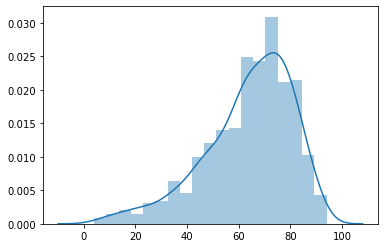

In [3]:
sns.distplot(trends)

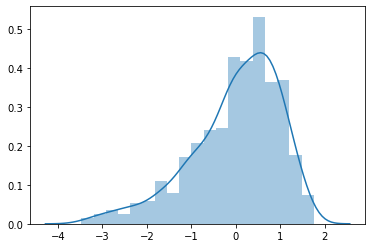

In [4]:
sns.distplot(trendsNorm)

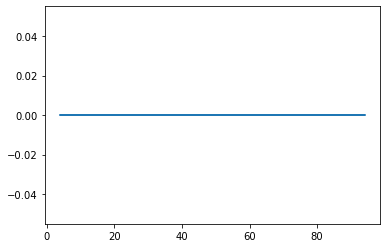

In [5]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(trends, np.zeros_like(trends))

In [6]:
df[df['Trends'] == 0].head(50)

,Unnamed: 0,Words,Meanings,Trends


In [7]:
trendNP = np.array(trends)

In [8]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(trendNP.reshape(-1, 1))

In [9]:
kmeans.cluster_centers_

array([[68.05932203],
       [35.05882353],
       [80.69724771],
       [60.92035398],
       [12.53333333],
       [52.65277778],
       [74.45535714],
       [87.97916667],
       [44.47272727],
       [24.35      ]])

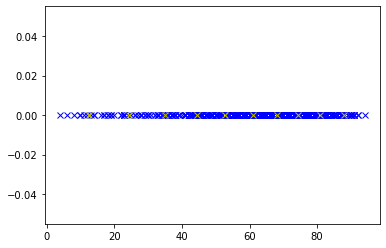

In [10]:
fig1 = plt.figure()
ax1 = plt.axes()

ax1.plot(trends, np.zeros_like(trends), 'bx')
ax1.plot(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), 'yx')

In [11]:
dfFinal = df.sort_values('Trends', ascending=False)
dfFinal = dfFinal[['Words', 'Meanings']]

In [12]:
dfAll = np.array_split(dfFinal, 14)

In [13]:
i = 0
for dfPt in dfAll:
    i += 1
    dfPt.to_csv(f'WordList/WordList-{i}.csv', index = False)

In [17]:
import os
nameArray = os.listdir('WordList')

In [18]:
for name in nameArray:
    df = pd.read_csv(f'WordList/{name}')
    df = df.apply(lambda x: x.astype(str).str.lower())
    df = df.sort_values(by = ['Words'])
    df.to_csv(f'WordList/{name}', index = False)

In [19]:
df = pd.read_csv(f'WordList/{nameArray[0]}')
df.head(10)

,Words,Meanings
0,ardor,intense passion
1,augment,to enlarge or increase
2,banal,repeated too often; overfamiliar through overuse
3,bilk,to cheat or swindle
4,chary,cautious; timid; choosy
5,coalesce,to blend into one
6,consummate,perfect and complete
7,crescendo,peak of growth
8,cynical,distrusting and pessimistic
9,divert,to turn away from a course
